# Explore here

In [75]:
# Your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

In [76]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [78]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [79]:
df.duplicated().sum()

np.int64(0)

## Análisis de variables númericas


In [80]:
variables = ['MedInc','Latitude', 'Longitude']

In [81]:
df = df[variables]

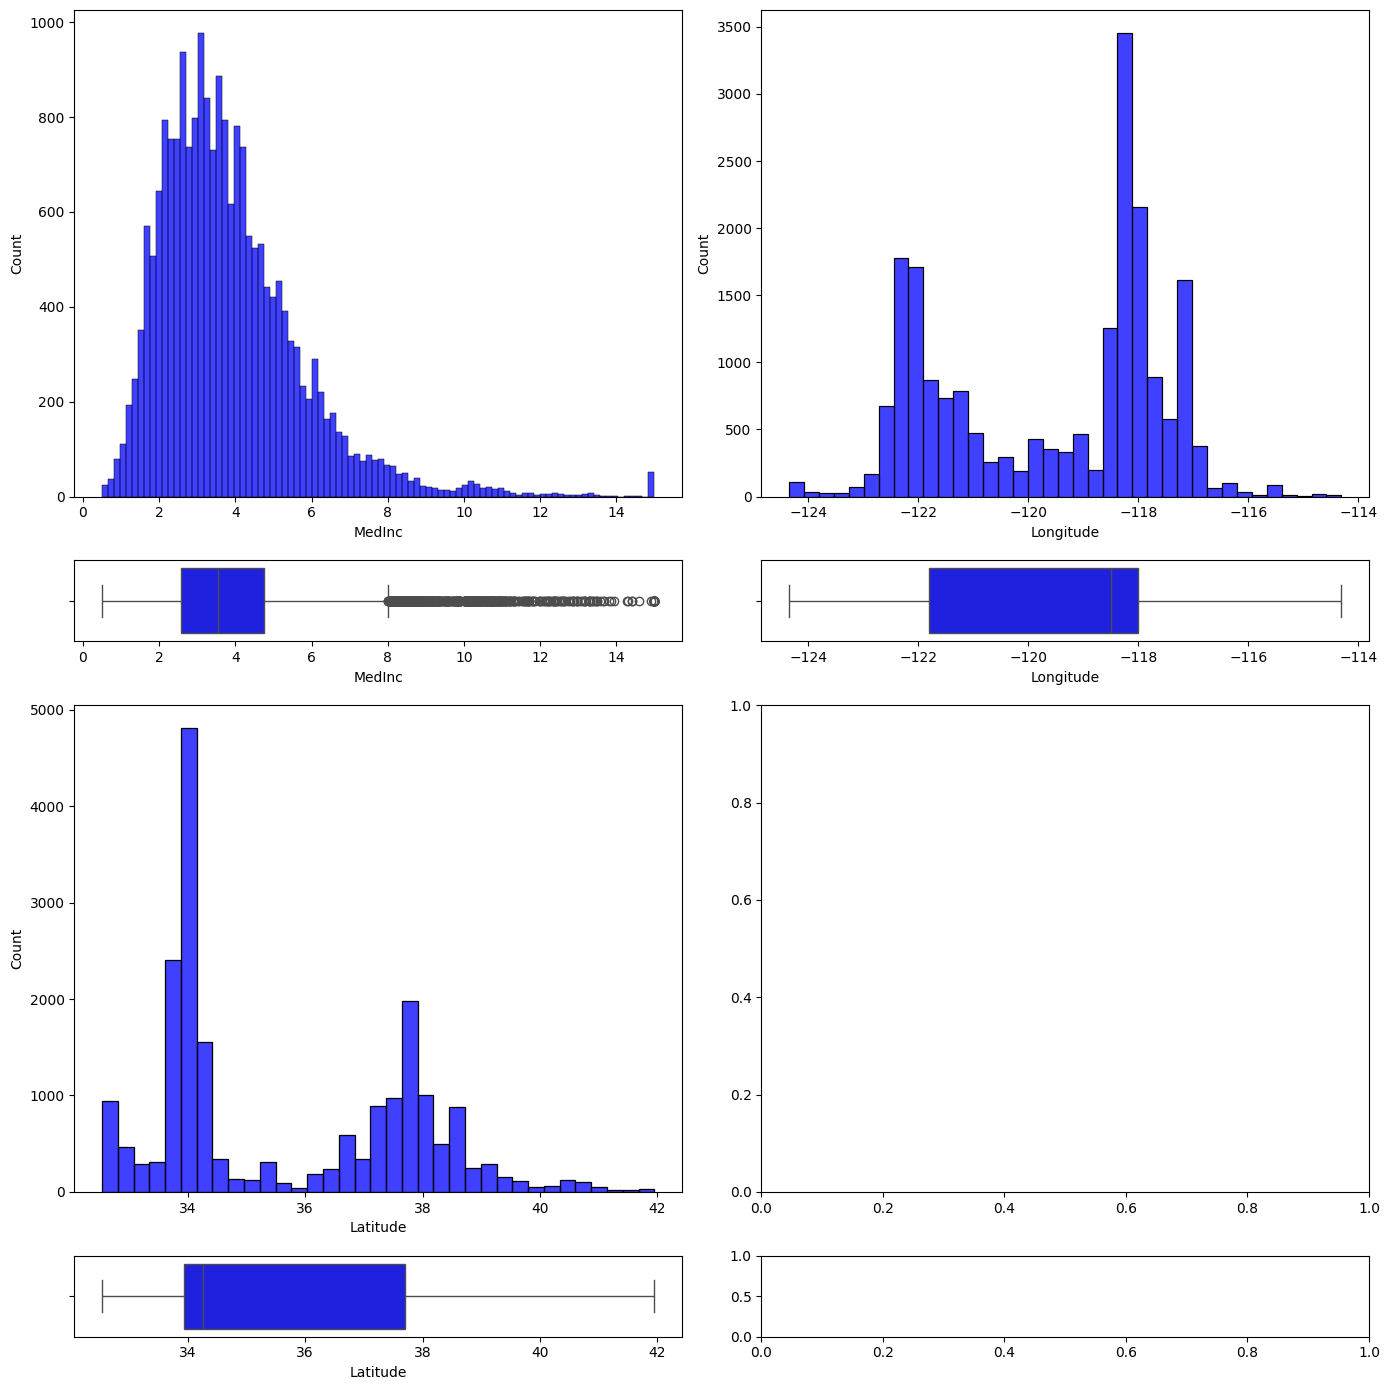

In [ ]:
# Creamos n filas (n variables x 2 filas cada una), 2 columnas (2 variables por fila)
fig, axis = plt.subplots(4, 2, figsize=(14, 14),gridspec_kw={"height_ratios": [6, 1]*2})

for idx, var in enumerate(variables):
    col = idx // 2        # 0 para las primeras n, 1 para las otras n
    row = (idx % 2) * 2   # filas 0, 2, 4... para histogramas; +1 para boxplots

    sns.histplot(ax=axis[row, col], data=df, x=var, color='b')
    axis[row, col]

    sns.boxplot(ax=axis[row + 1, col], data=df, x=var, orient='h', color='b')
    axis[row + 1, col]

# Ajustamos el diseño
plt.tight_layout()
plt.show()

In [83]:
# Detectar outliers usando el método IQR
outliers = {}

for columna in variables:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    outliers[columna] = len(outlier_indices)
    print(f"'{columna}': {len(outlier_indices)} outliers detectados.")

'MedInc': 681 outliers detectados.
'Latitude': 0 outliers detectados.
'Longitude': 0 outliers detectados.


In [84]:
df_sin_outliers = df.copy()

for columna in variables:
    Q1 = df_sin_outliers[columna].quantile(0.25)
    Q3 = df_sin_outliers[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    # Filtrar los datos que están dentro de los límites
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & (df_sin_outliers[columna] <= upper_bound)]

print(f"Nuevo tamaño del DataFrame: {df_sin_outliers.shape}")

Nuevo tamaño del DataFrame: (20168, 3)


In [85]:
print("Porcentaje que se redujo:",(len(df_sin_outliers) / len(df)-1)*100,"%")

Porcentaje que se redujo: -2.286821705426356 %


In [86]:
df_clean = df_sin_outliers
df_clean

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


<Axes: >

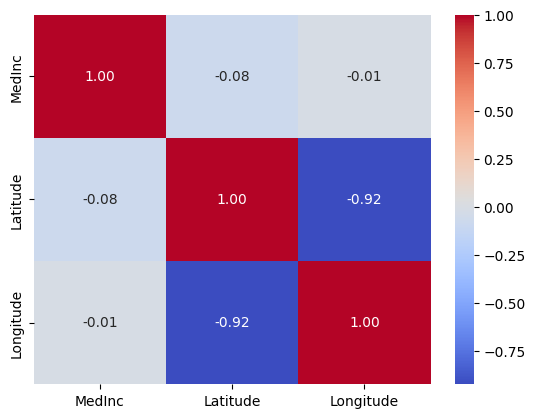

In [87]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm',fmt = ".2f")

## Scaled


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

df_scaled

array([[ 2.97335324,  1.04554134, -1.32804856],
       [ 2.95803521,  1.03620558, -1.32305957],
       [ 2.28610179,  1.0315377 , -1.33303755],
       ...,
       [-1.29072082,  1.76906265, -0.824161  ],
       [-1.18310849,  1.76906265, -0.87405086],
       [-0.84752795,  1.74105538, -0.83413897]], shape=(20168, 3))

In [89]:
from sklearn.model_selection import train_test_split

X = df_scaled
y = df_scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


print('El tamaño de X train es de:' ,X_train.shape)
print('El tamaño de Y train es de:' ,y_train.shape)
print('El tamaño de X test es de:' ,X_test.shape)
print('El tamaño de y test es de:' ,y_test.shape)

El tamaño de X train es de: (16134, 3)
El tamaño de Y train es de: (16134, 3)
El tamaño de X test es de: (4034, 3)
El tamaño de y test es de: (4034, 3)


## Modelado

In [90]:
# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [91]:
# Obtener los centros de los clusters y las etiquetas
centroids = model.cluster_centers_
labels = model.labels_

In [92]:
centroids

array([[ 0.2377061 ,  1.03601923, -1.16236202],
       [ 1.16208621, -0.82626935,  0.76049749],
       [-0.54082812, -0.84954062,  0.86770517],
       [-0.74226684,  0.21903657, -0.07615899],
       [ 1.66279417,  0.93983412, -1.18545013],
       [-0.87503161,  1.36423732, -1.15493773]])

In [93]:
labels

array([3, 0, 2, ..., 1, 0, 0], shape=(16134,), dtype=int32)

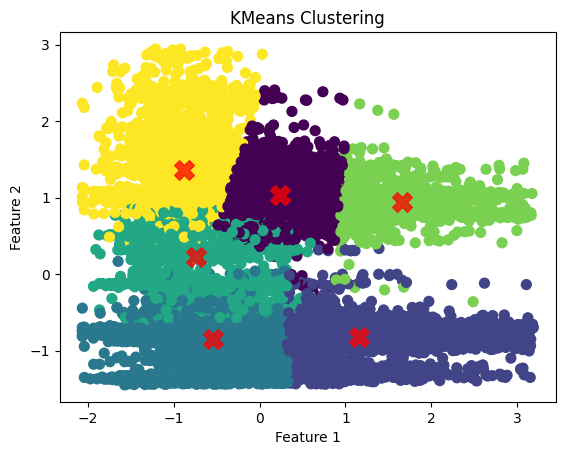

In [94]:
# Visualizar los resultados
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [95]:
X_train_df = pd.DataFrame(X_train, columns=df.columns)  # Usa las columnas originales
X_train_df['cluster'] = pd.Series(labels).astype('category')


In [96]:
X_train_df

,MedInc,Latitude,Longitude,cluster
0,-0.844760,0.765469,-0.435020,3
1,0.177878,0.499399,-1.028709,0
2,-1.242900,-1.344413,1.241279,2
3,-1.166053,-1.325741,1.311125,2
4,-0.029816,-0.662903,0.582733,2
...,...,...,...,...
16129,1.476821,-0.868289,0.777303,1
16130,-0.624966,-0.774932,1.226312,2
16131,2.435613,-0.779600,0.592711,1
16132,-0.086261,0.863494,-1.178379,0


### Predicción

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=df.columns)


In [111]:
y_test = list(model.predict(X_test))
X_test_df["cluster"] = y_test
X_test_df.head()


,MedInc,Latitude,Longitude,cluster
0,-0.230559,-0.826278,0.817215,2
1,-0.258621,-0.821610,0.847149,2
2,-0.184541,1.573012,-1.587476,0
3,1.069992,0.798144,-1.223280,4
4,1.329369,-0.928972,0.991830,1


In [112]:
centroids_pre = model.cluster_centers_
labels_pre = model.labels_

In [113]:
X_test

array([[-0.2305592 , -0.82627831,  0.81721531],
       [-0.25862078, -0.82161043,  0.84714922],
       [-0.18454077,  1.57301172, -1.58747582],
       ...,
       [ 1.03246968, -0.85428558,  0.68251269],
       [ 0.44729548,  0.74679706, -1.16341203],
       [ 0.91571803,  0.91017284, -1.45776219]], shape=(4034, 3))

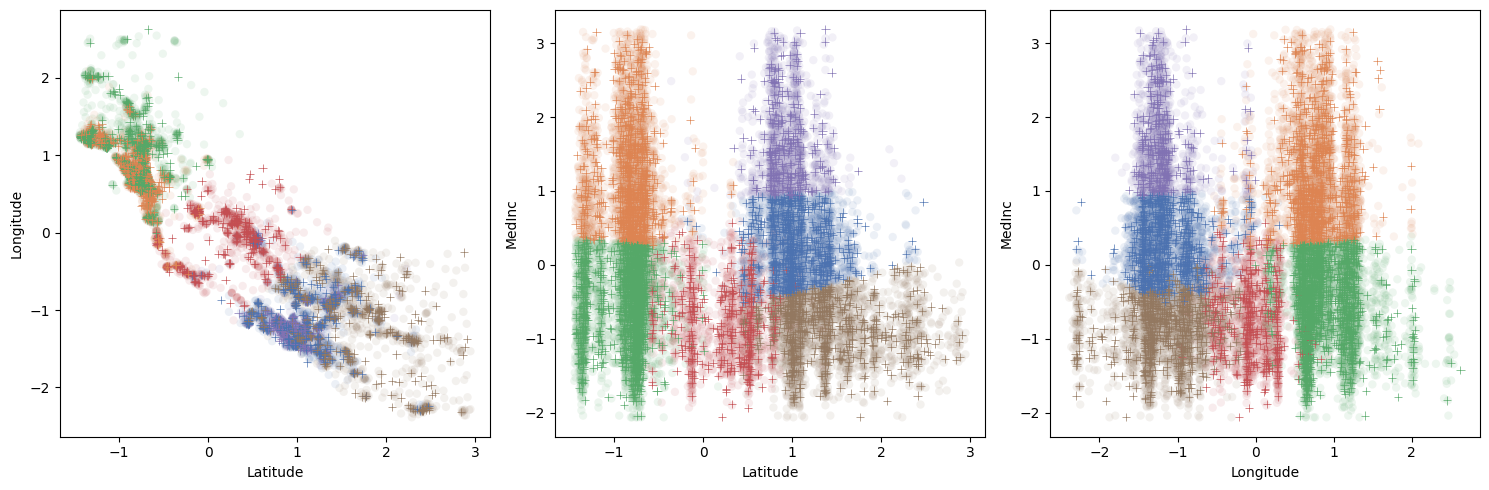

In [114]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train_df, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train_df, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train_df, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test_df, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test_df, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test_df, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

## Modelo de clasificación supervisado

In [115]:
y_train_knn = X_train_df['cluster']
X_train_knn = X_train_df.drop(columns='cluster')

X_test_knn = X_test_df.drop(columns='cluster')
y_test_knn = X_test_df['cluster']

print(y_train_knn.shape)
print(X_train_knn.shape)
print(y_test_knn.shape)
print(X_test_knn.shape)

(16134,)
(16134, 3)
(4034,)
(4034, 3)


In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Instanciar el modelo KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

# 2. Entrenar con los datos del train
model_knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [121]:
# 3. Predecir sobre el test set
y_pred_knn = model_knn.predict(X_test_knn)
y_pred_knn

array([2, 2, 0, ..., 1, 0, 0], shape=(4034,), dtype=int32)

In [123]:
# 4. Evaluar el rendimiento
print("Reporte de clasificación:")
print(classification_report(y_test_knn, y_pred_knn))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       613
           1       1.00      0.99      0.99       827
           2       1.00      1.00      1.00      1389
           3       0.99      0.98      0.98       337
           4       1.00      0.98      0.99       282
           5       0.98      0.99      0.99       586

    accuracy                           0.99      4034
   macro avg       0.99      0.99      0.99      4034
weighted avg       0.99      0.99      0.99      4034



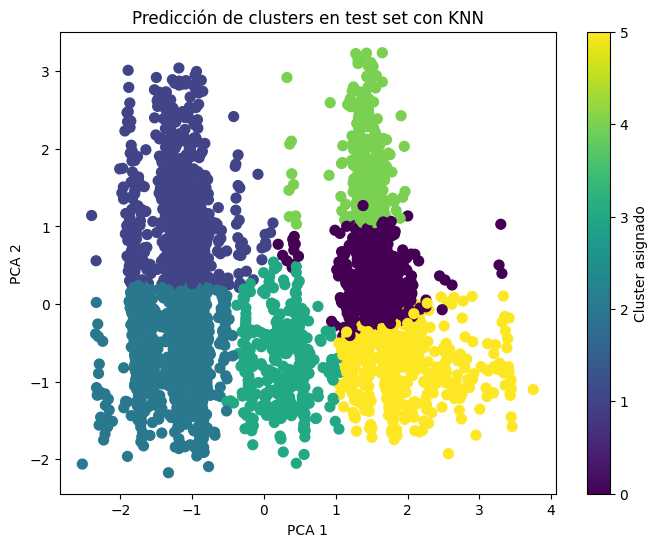

In [124]:
from sklearn.decomposition import PCA

# Reducir a 2D para visualización
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test_knn)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_pred_knn, cmap='viridis', s=50)
plt.title("Predicción de clusters en test set con KNN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster asignado")
plt.show()

## Guardar modelos

In [126]:
from pickle import dump

dump(model, open("/workspaces/UNSUPERVISED_LEARNING_JesusCastanedam/models/k-means_default_42.sav", "wb"))
dump(model_knn, open("/workspaces/UNSUPERVISED_LEARNING_JesusCastanedam/models/KNeighbors_Classifier_default_k5.sav", "wb"))